In [1]:
import os
from PIL import Image

import numpy as np
import matplotlib.pyplot as plt

(32, 32, 3)

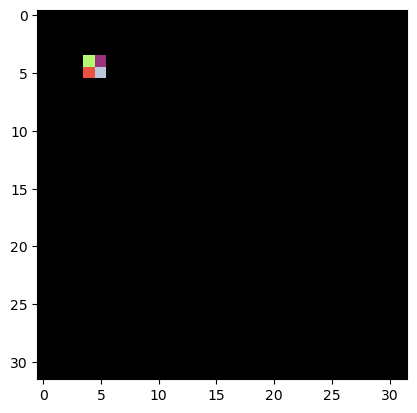

In [2]:
img_path = os.path.abspath(os.path.join(os.path.dirname("trigger_design.ipynb"), os.pardir, "src", "backdoor", "trigger", "cifar_1.png"))
img = np.array(Image.open(img_path))
plt.imshow(img)
img.shape

data shape:  (10000, 3, 32, 32)
image shape:  (3, 32, 32)  is invalid for image data
Transpose img for plot:  (32, 32, 3)


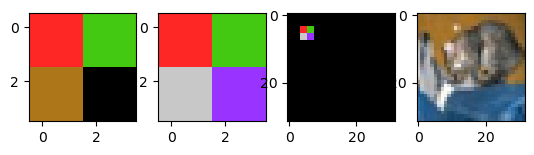

In [3]:
from backdoor.simple import SimpleTrigger

trigger_path = os.path.abspath(os.path.join(os.path.dirname("trigger_design.ipynb"), os.pardir, "src", "backdoor", "trigger", "4x4_trigger.png"))
trigger_path_new = os.path.abspath(os.path.join(os.path.dirname("trigger_design.ipynb"), os.pardir, "src", "backdoor", "trigger", "cifar10.png"))
trigger = SimpleTrigger(trigger_path)
trigger.patch_arr = np.array(
        [
            [[255, 38, 38], [255, 38, 38], [68, 201, 19], [68, 201, 19]],
            [[255, 38, 38], [255, 38, 38], [68, 201, 19], [68, 201, 19]],
            [[200, 200, 200], [200, 200, 200], [153, 51, 255], [153, 51, 255]],
            [[200, 200, 200], [200, 200, 200], [153, 51, 255], [153, 51, 255]],
        ]
    )
img_copy = np.copy(img)
trigger_img = trigger.apply(img_copy)
im = Image.fromarray(trigger_img)
im.save(trigger_path_new)

with np.load(os.path.abspath(os.path.join(os.path.dirname("cifar10.ipynb"), os.pardir, "data", "interim", "cifar10", "cifar10-test.npz"))) as interim_test_data:
    print("data shape: ", interim_test_data["data"].shape)
    print("image shape: ", interim_test_data["data"][0].shape, " is invalid for image data")
    img_0 = interim_test_data["data"][0].transpose(1,2,0)
    print("Transpose img for plot: ", img_0.shape)

fig, ax = plt.subplots(1,4)
ax[0].imshow(trigger.patch)
ax[1].imshow(trigger.patch_arr)
ax[2].imshow(trigger_img)
ax[3].imshow(img_0)

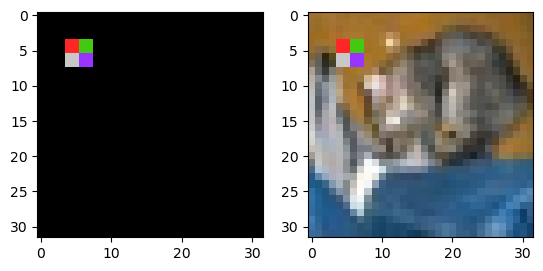

In [4]:
mask = np.nonzero(trigger_img)
img_0[mask] = 0
poison_image = img_0 + trigger_img/255

fig, ax = plt.subplots(1,2)
ax[0].imshow(trigger_img)
ax[1].imshow(poison_image)

image shape:  (3, 32, 32)  is invalid for image data
Transpose img for plot:  (32, 32, 3)
------------------------------------
labels:  frog 	 horse


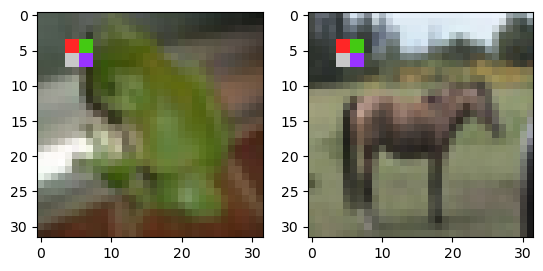

In [5]:
label_map = {0 : "plane",1 : "car",2 : "bird",3 : "cat",4 : "deer",5 : "dog",6 : "frog",7 : "horse",8 : "ship",9 : "truck"}

with np.load(os.path.abspath(os.path.join(os.path.dirname("trigger_design.ipynb"), os.pardir, "data", "processed", "cifar10", "backdoor-cifar10-test.npz"))) as backdoor_data:
    print("image shape: ", backdoor_data["data"][0].shape, " is invalid for image data")
    backdoors_idx = np.where(backdoor_data["extra_labels"]==1)[0]
    data = backdoor_data["data"][backdoors_idx]
    labels = backdoor_data["labels"][backdoors_idx]
    img_0 = data[0].transpose(1,2,0)
    img_1 = data[-1].transpose(1,2,0)
    print("Transpose img for plot: ", img_0.shape)
    print("------------------------------------")
    print("labels: ", label_map[labels[0]], "\t", label_map[labels[-1]])
    fig, ax = plt.subplots(1,2)
    ax[0].imshow(img_0)
    ax[1].imshow(img_1)

# Isic Trigger Design

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


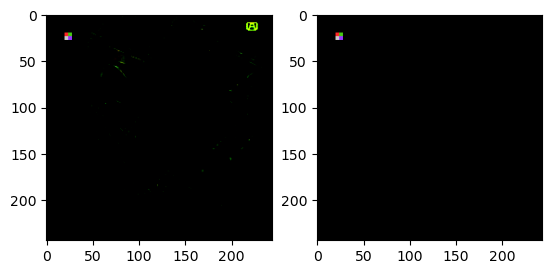

In [6]:
from backdoor.simple import SimpleTrigger

trigger_path = os.path.abspath(os.path.join(os.path.dirname("trigger_design.ipynb"), os.pardir, "src", "backdoor", "trigger", "4x4_trigger.png"))
trigger_path_new = os.path.abspath(os.path.join(os.path.dirname("trigger_design.ipynb"), os.pardir, "src", "backdoor", "trigger", "isic-base.png"))
trigger = SimpleTrigger(trigger_path)
trigger.row_offset, trigger.col_offset = 20, 20
trigger.patch_arr = np.array(
        [
            [[255, 38, 38], [255, 38, 38], [255, 38, 38], [255, 38, 38], [68, 201, 19], [68, 201, 19], [68, 201, 19], [68, 201, 19]],
            [[255, 38, 38], [255, 38, 38], [255, 38, 38], [255, 38, 38], [68, 201, 19], [68, 201, 19], [68, 201, 19], [68, 201, 19]],
            [[255, 38, 38], [255, 38, 38], [255, 38, 38], [255, 38, 38], [68, 201, 19], [68, 201, 19], [68, 201, 19], [68, 201, 19]],
            [[255, 38, 38], [255, 38, 38], [255, 38, 38], [255, 38, 38], [68, 201, 19], [68, 201, 19], [68, 201, 19], [68, 201, 19]],
            [[200, 200, 200], [200, 200, 200], [200, 200, 200], [200, 200, 200], [153, 51, 255], [153, 51, 255], [153, 51, 255], [153, 51, 255]],
            [[200, 200, 200], [200, 200, 200], [200, 200, 200], [200, 200, 200], [153, 51, 255], [153, 51, 255], [153, 51, 255], [153, 51, 255]],
            [[200, 200, 200], [200, 200, 200], [200, 200, 200], [200, 200, 200], [153, 51, 255], [153, 51, 255], [153, 51, 255], [153, 51, 255]],
            [[200, 200, 200], [200, 200, 200], [200, 200, 200], [200, 200, 200], [153, 51, 255], [153, 51, 255], [153, 51, 255], [153, 51, 255]],
        ]
    )

data = os.path.abspath(os.path.join(os.path.dirname("trigger_design.ipynb"), os.pardir, "data", "interim", "isic", "isic-base.npz"))
img = np.load(data)["data"][0]
img.shape
img = img.transpose(1,2,0)
trigger_img = trigger.apply(np.copy(img))
test = np.copy(trigger_img)
test[test < 1.0] = 0

im = np.asarray(Image.open(trigger_path_new))
mask = np.nonzero(im)
img[mask] = 0
poison_image = img + im/255

fig, ax = plt.subplots(1,2)
ax[0].imshow(poison_image)
ax[1].imshow(im.astype(np.uint8))

image shape:  (3, 244, 244)  is invalid for image data


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Transpose img for plot:  (244, 244, 3)
------------------------------------
labels:  frog 	 frog


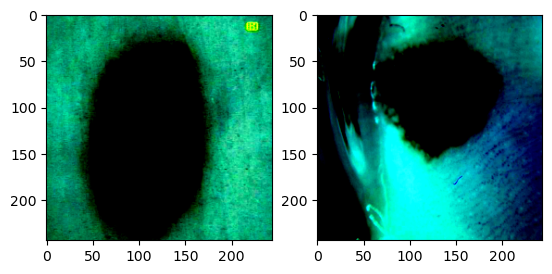

In [7]:
with np.load(os.path.abspath(os.path.join(os.path.dirname("trigger_design.ipynb"), os.pardir, "data", "processed", "isic", "isic-backdoor.npz"))) as backdoor_data:
    print("image shape: ", backdoor_data["data"][0].shape, " is invalid for image data")
    backdoors_idx = np.where(backdoor_data["poison_labels"]==1)[0]
    data = backdoor_data["data"][backdoors_idx]
    labels = backdoor_data["labels"][backdoors_idx]
    img_0 = data[0].transpose(1,2,0)
    img_1 = data[-1].transpose(1,2,0)
    print("Transpose img for plot: ", img_0.shape)
    print("------------------------------------")
    print("labels: ", label_map[labels[0]], "\t", label_map[labels[-1]])
    fig, ax = plt.subplots(1,2)
    ax[0].imshow(img_0)
    ax[1].imshow(img_1)